<a href="https://colab.research.google.com/github/nmq443/cognitive-science-final-project/blob/main/atcnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!git clone https://github.com/nmq443/cognitive-science-final-project.git

Cloning into 'cognitive-science-final-project'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 163 (delta 75), reused 87 (delta 26), pack-reused 0
Receiving objects: 100% (163/163), 4.15 MiB | 17.28 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [3]:
import os

os.chdir('/content/cognitive-science-final-project/')

In [4]:
print(os.getcwd())

/content/cognitive-science-final-project


In [5]:
from train import train_model
from utils import getModel
from evaluation import test
import os

In [6]:
import tensorflow as tf

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.64.31.10:8470']


In [7]:
def run():
    # Define dataset parameters
    dataset = 'BCI2a' # Options: 'BCI2a','HGD', 'CS2R'

    if dataset == 'BCI2a':
        in_samples = 1125
        n_channels = 22
        n_sub = 9
        n_classes = 4
        classes_labels = ['Left hand', 'Right hand','Foot','Tongue']
        data_path = os.path.expanduser('/content/drive/MyDrive') + '/BCI Competition IV/BCI Competition IV-2a/BCI Competition IV 2a mat/'
    elif dataset == 'HGD':
        in_samples = 1125
        n_channels = 44
        n_sub = 14
        n_classes = 4
        classes_labels = ['Right Hand', 'Left Hand','Rest','Feet']
        data_path = os.path.expanduser('/content/drive/MyDrive') + '/mne_data/MNE-schirrmeister2017-data/robintibor/high-gamma-dataset/raw/master/data/'
    elif dataset == 'CS2R':
        in_samples = 1125
        # in_samples = 576
        n_channels = 32
        n_sub = 18
        n_classes = 3
        # classes_labels = ['Fingers', 'Wrist','Elbow','Rest']
        classes_labels = ['Fingers', 'Wrist','Elbow']
        # classes_labels = ['Fingers', 'Elbow']
        data_path = os.path.expanduser('/content/drive/MyDrive') + '/CS2R MI EEG dataset/all/EDF - Cleaned - phase one (remove extra runs)/two sessions/'
    else:
        raise Exception("'{}' dataset is not supported yet!".format(dataset))

    # Create a folder to store the results of the experiment
    results_path = os.getcwd() + "/results"
    if not  os.path.exists(results_path):
      os.makedirs(results_path)   # Create a new directory if it does not exist

    # Set dataset paramters
    dataset_conf = { 'name': dataset, 'n_classes': n_classes, 'cl_labels': classes_labels,
                    'n_sub': n_sub, 'n_channels': n_channels, 'in_samples': in_samples,
                    'data_path': data_path, 'isStandard': True, 'LOSO': False}
    # Set training hyperparamters
    train_conf = { 'batch_size': 64, 'epochs': 500, 'patience': 100, 'lr': 0.001,'n_train': 1,
                  'LearnCurves': True, 'from_logits': False, 'model':'ATCNet'}

    # Train the model
    train_model(dataset_conf, train_conf, results_path)

    # Evaluate the model based on the weights saved in the '/results' folder
    model = getModel(train_conf.get('model'), dataset_conf)
    test(model, dataset_conf, results_path)



Training on subject  1
2/2 [==============================] - 2s 332ms/step
Subject: 1   seed 1   time: 12.5 m   valid_acc: 0.8621   valid_loss: 0.670
Plot Learning Curves ....... 


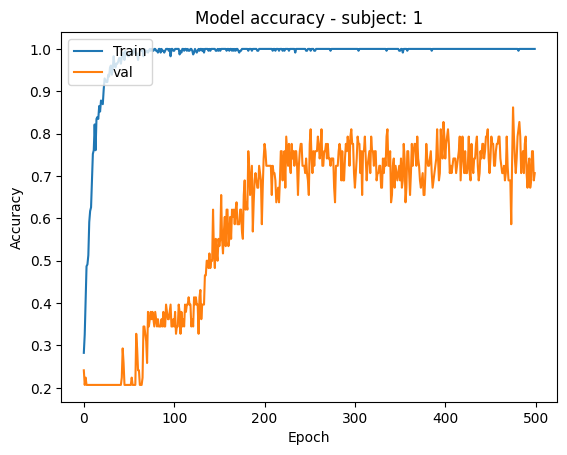

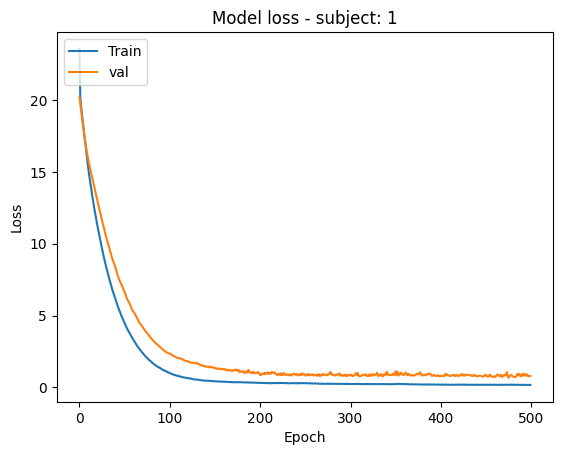


Training on subject  2
2/2 [==============================] - 1s 325ms/step
Subject: 2   seed 1   time: 12.7 m   valid_acc: 0.7759   valid_loss: 0.818
Plot Learning Curves ....... 


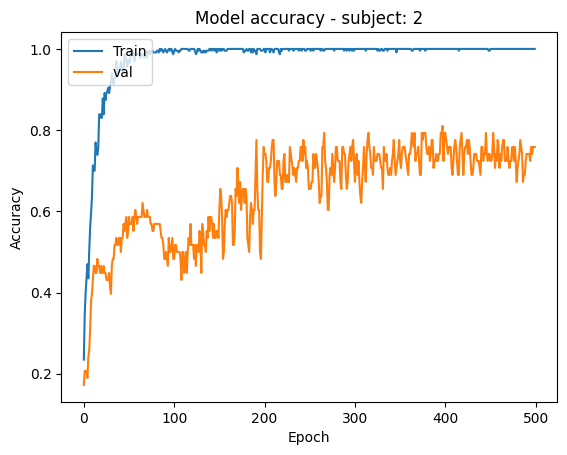

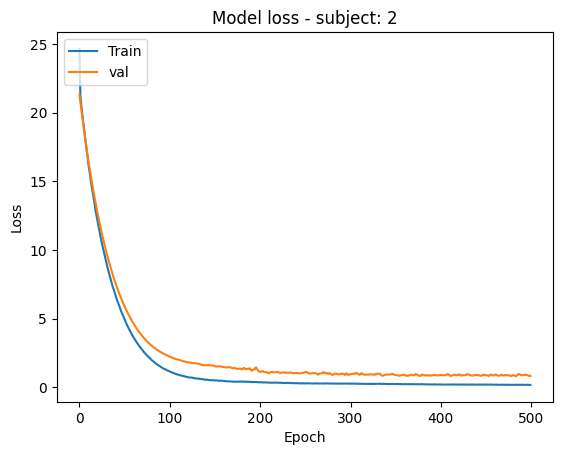


Training on subject  3
2/2 [==============================] - 1s 334ms/step
Subject: 3   seed 1   time: 12.5 m   valid_acc: 0.9655   valid_loss: 0.444
Plot Learning Curves ....... 


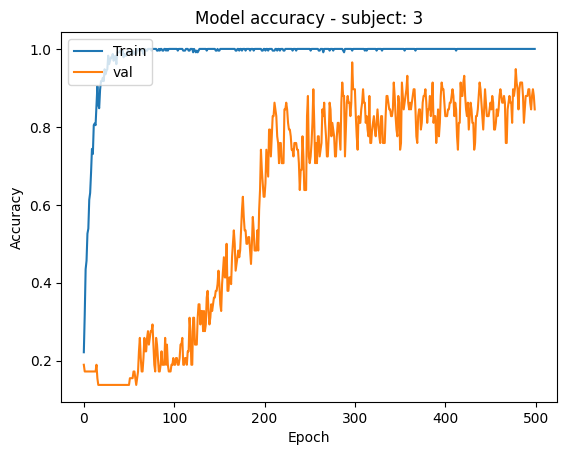

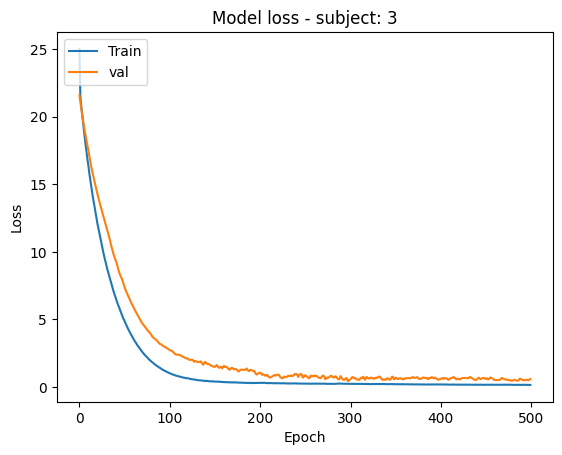


Training on subject  4
2/2 [==============================] - 1s 344ms/step
Subject: 4   seed 1   time: 12.7 m   valid_acc: 0.8276   valid_loss: 0.819
Plot Learning Curves ....... 


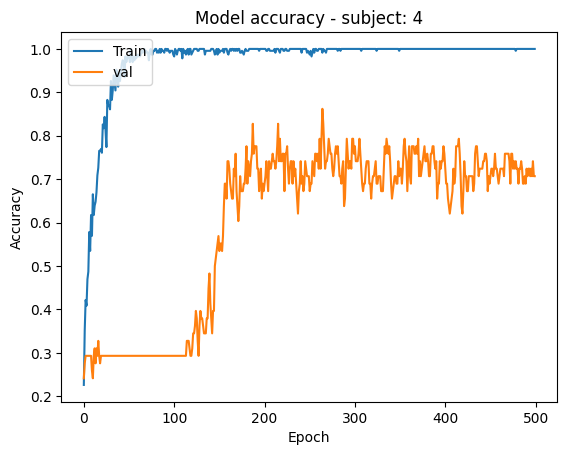

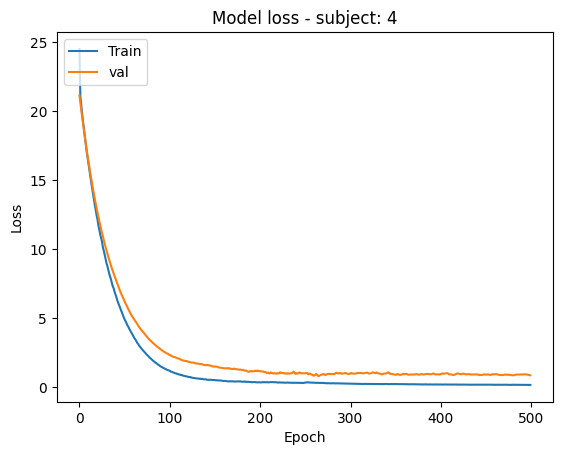


Training on subject  5


2/2 [==============================] - 1s 328ms/step
Subject: 5   seed 1   time: 12.6 m   valid_acc: 0.8621   valid_loss: 0.628
Plot Learning Curves ....... 


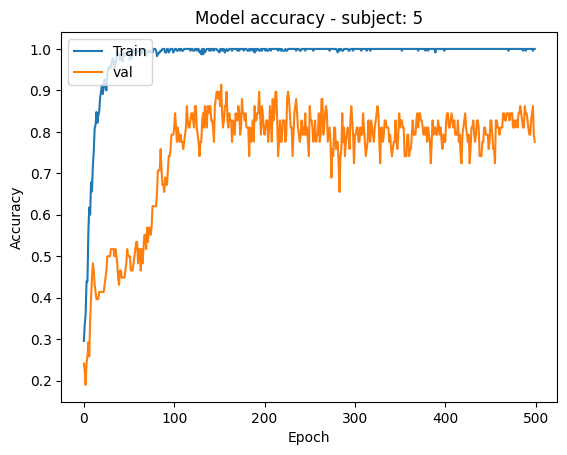

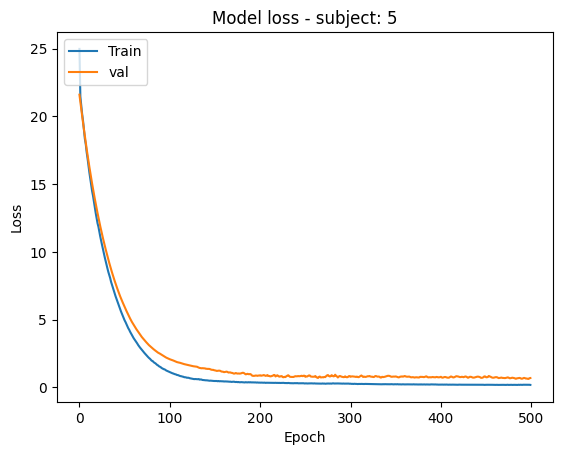


Training on subject  6


In [ ]:
run()